# Phân tích khách sạn Việt Nam

Mục đích của bài phân tích này để có cái nhìn rõ hơn về lĩnh vực khách sạn của Việt Nam nói riêng và cả thị trường du lịch Việt Nam nói chung. Bài phân tích này sẽ tập trung nói về lĩnh vực khách sạn ở Việt Nam và các yếu tố phân tích dựa trên dữ liệu được lấy từ trang web `Agoda.com`.

## Background

### Thị trường Việt Nam

Đại dịch COVID-19 đã đem đến nhiều tín hiệu tiêu cực cho nền kinh tế Việt Nam. Tuy nhiên, nhờ vào nỗ lực khôi phục nền và các chính sách của Nhà nước, nền kinh tế đã phục hồi rất tốt. 
Đây là một cơ hội lớn cho ngành dịch vụ ở Việt Nam, đặc biệt là ngành du lịch trong bối cảnh hội nhập kinh tế ngày mọt phát triển.

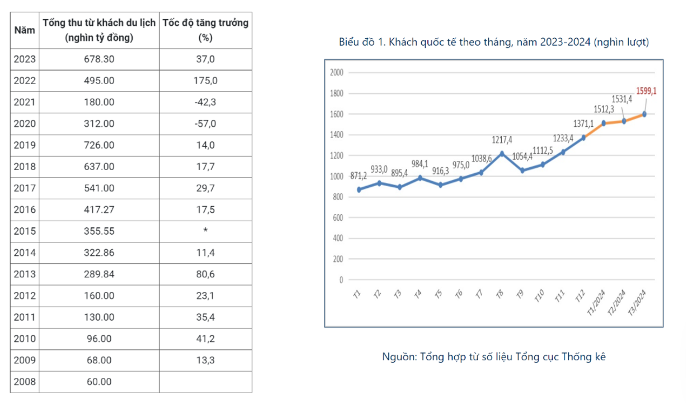

Kể từ sau giãn cách năm 2021, riêng về tổng thu từ khách du lịch đã có tốc độ tăng trưởng đáng kể, và đang dần trên đà hồi phục.

### Thị trường quốc tế

Theo trang báo `https://thanhnien.vn/viet-nam-trong-top-20-diem-den-dong-khach-nhat-mua-he-185230920140106837.htm`, năm 2023 ngành du lịch Việt Nam so với thế giới đón nhiều tích cực.

    Xếp hạng các quốc gia được ghé thăm nhiều nhất, đứng đầu là Mỹ, với tỷ lệ chênh lệch đáng kể khi thu hút 11% tổng số du khách quốc tế trong mùa hè 2023. Tiếp theo là Tây Ban Nha, Anh, Ý, Nhật Bản, Pháp, Mexico, Đức, Canada và Thổ Nhĩ Kỳ.
    Trong danh sách này, Việt Nam xếp thứ 19, sau Thái Lan, UAE, Bồ Đào Nha, Ả Rập Xê Út, Hàn Quốc nhưng trên Thụy Sĩ, Philippines, Singapore, Indonesia...

Theo `https://www.vietnamplus.vn/luong-tim-kiem-cua-du-khach-quoc-te-ve-du-lich-viet-nam-xep-thu-6-toan-cau-post919417.vnp`

    Theo công cụ theo dõi xu hướng thị trường của Google, lượng tìm kiếm của du khách quốc tế về du lịch Việt Nam năm 2023 đạt mức tăng trưởng trên 75%, xếp thứ 6 toàn cầu.
    Top 10 thị trường tìm kiếm nhiều nhất về du lịch Việt Nam có: Mỹ, Australia, Nhật Bản, Ấn Độ, Hàn Quốc, Singapore, Anh, Đức, Malaysia và Thái Lan.
    Các điểm đến được tìm kiếm nhiều nhất, ngoài 2 Thành phố Hồ Chí Minh và Hà Nội, còn 2 điểm đến du lịch biển nổi tiếng là Đà Nẵng, Phú Quốc. Tiếp theo là Hội An, Nha Trang, Đà Lạt, Huế và Phan Thiết.

**Kết luận**: Việt Nam là một đất nước giáp biển và giàu danh lam thắng cảnh. Các điểm đến du lịch của Việt Nam cũng đa dạng từ các vùng biển đến vùng núi, và cả những khu vực đồng quê nông thôn,... Tuy nhiên thì việc khai thác thế mạnh này vẫn còn nhiều hạn chế có thể kể đến như cơ sở hạ tầng và công tác bảo tổn các di sản văn hóa.

## Vietnam Hotel Dataset

### Importing Packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re

`FutureWarning` 

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore')

In [3]:
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

### Overview

Đây là data được lấy từ `Agoda.com`.

In [4]:
df = pd.read_csv("vietnam.csv")
df.head(3)

,hotel_id,chain_id,chain_name,brand_id,brand_name,hotel_name,hotel_formerly_name,hotel_translated_name,addressline1,addressline2,...,rates_from,continent_id,continent_name,city_id,country_id,number_of_reviews,rating_average,rates_currency,rates_from_exclusive,accommodation_type
0,163,0,No chain,0,NaN,Ramana Saigon Hotel,Amara Hotel,Ramana Saigon Hotel,"323 Le Van Sy Street, District 3",NaN,...,NaN,2,Asia,13170,38,1713,8.1,USD,NaN,Hotel
1,902,0,No chain,0,NaN,Lotte Hotel Saigon,Legend Hotel Saigon,Lotte Hotel Saigon,"2A-4A Ton Duc Thang Street, District 1",NaN,...,NaN,2,Asia,13170,38,6260,9.0,USD,NaN,Hotel
2,2019,0,No chain,894,No brand,Victoria Hoi An Beach Resort & Spa,NaN,Victoria Hoi An Beach Resort & Spa,Cua Dai Beach,NaN,...,NaN,2,Asia,16552,38,2330,8.9,USD,NaN,Resort


In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29446 entries, 0 to 29445
Columns: 41 entries, hotel_id to accommodation_type
dtypes: float64(10), int64(7), object(24)
memory usage: 9.2+ MB


In [6]:
df.describe(exclude=['O'])

,hotel_id,chain_id,brand_id,star_rating,longitude,latitude,numberrooms,numberfloors,yearopened,yearrenovated,rates_from,continent_id,city_id,country_id,number_of_reviews,rating_average,rates_from_exclusive
count,2.944600e+04,29446.00000,29446.000000,29446.000000,29446.000000,29446.000000,27204.000000,5753.000000,5258.000000,3057.000000,0.0,29446.000000,29446.000000,29446.0,29446.000000,29446.000000,0.0
mean,2.846732e+07,207.26625,820.529851,2.996808,106.891344,15.130181,16.268858,8.035634,2005.326170,1940.116781,NaN,2.000136,33172.076411,38.0,99.480609,4.626982,NaN
std,1.712072e+07,959.82972,1162.888106,1.879641,2.040459,4.559601,77.005534,8.199038,146.946457,392.286488,NaN,0.023310,72502.041469,0.0,418.006210,4.280751,NaN
min,1.630000e+02,0.00000,0.000000,0.000000,-86.425941,-24.360586,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,2679.000000,38.0,0.000000,0.000000,NaN
25%,1.065537e+07,0.00000,0.000000,2.000000,105.848627,10.787937,1.000000,3.000000,2014.000000,2016.000000,NaN,2.000000,13170.000000,38.0,0.000000,0.000000,NaN
50%,3.424467e+07,0.00000,894.000000,3.000000,106.710453,13.103620,1.000000,6.000000,2018.000000,2020.000000,NaN,2.000000,15932.000000,38.0,1.000000,6.600000,NaN
75%,4.206225e+07,0.00000,894.000000,5.000000,108.240994,20.956778,10.000000,9.000000,2020.000000,2022.000000,NaN,2.000000,17188.000000,38.0,20.000000,8.800000,NaN
max,5.254488e+07,5826.00000,6813.000000,5.000000,175.796432,41.030918,4800.000000,81.000000,2024.000000,2323.000000,NaN,6.000000,737657.000000,38.0,10416.000000,10.000000,NaN


## DataFrames

Để tiện hơn cho việc phân tích từ đây mình sẽ chia thành loại DataFrame:

### Accommodation Type

Đây là các loại `accomdation_type` ở Việt Nam. Việc chia ra thành các loại hình lưu trú khác nhau nhằm nhấn mạnh vào các nội dung cần lưu ý.

In [7]:
hotel_type = pd.Series(df.accommodation_type.unique()).dropna().tolist()
type_list = [type.split(', ') for type in hotel_type]
series = pd.Series(type_list)
flattened_series = series.explode().unique()
flattened_list = flattened_series.tolist()
flattened_list

['Hotel',
 'Resort',
 'Lodge',
 'Resort villa',
 'Serviced apartment',
 'Hostel',
 'Entire apartment',
 'Guesthouse/bed and breakfast',
 'Boat/cruise',
 'Homestay',
 'Motel',
 'Inn',
 'Entire house',
 'Entire villa',
 'Farm stay',
 'Capsule hotel',
 'Country house',
 'Entire bungalow',
 'Tent',
 'Holiday park/caravan park',
 'Love hotel',
 'Chalet']

Cụ thể các loại hình lưu trú như `Boat/cruise`, `Entire villa` thường được khá ít review mà số lượng phòng cũng không cao.

In [8]:
df_type = df[['hotel_id','accommodation_type']]
df_type[['type1','type2','type3','type4']] = df_type['accommodation_type'].str.split(', ', expand=True)
df_type.head()
# test[(test['type1'] == 'Hotel') | (test['type2'] == 'Hotel') | (test['type3'] == 'Hotel')| (test['type4'] == 'Hotel')]

,hotel_id,accommodation_type,type1,type2,type3,type4
0,163,Hotel,Hotel,None,None,None
1,902,Hotel,Hotel,None,None,None
2,2019,Resort,Resort,None,None,None
3,3274,Hotel,Hotel,None,None,None
4,9195,Hotel,Hotel,None,None,None


In [9]:
df_type.to_csv('df_type.csv', index=False)  # Set index=False to avoid writing row numbers

### Considering

Qua một số phân tích về mặt dữ liệu, ta có thể thấy chỉ có một số dữ liệu cần quan tâm về mặt phân tích.
- `hotel_id`, `hotel_name`, `addressline1`, `city`, `state`, `numberrooms`, `yearopened`, `yearrenovated`, `number_of_reviews`, `rating_average`, `star_rating`, `accommodation_type`

In [10]:
hotel = df[['hotel_id', 'hotel_name', 'addressline1', 'city', 'state', 'numberrooms', 'yearopened', 'yearrenovated', 'number_of_reviews', 'rating_average', 'star_rating','accommodation_type']]
hotel.head(3)

,hotel_id,hotel_name,addressline1,city,state,numberrooms,yearopened,yearrenovated,number_of_reviews,rating_average,star_rating,accommodation_type
0,163,Ramana Saigon Hotel,"323 Le Van Sy Street, District 3",Ho Chi Minh City,NaN,296.0,1996.0,2015.0,1713,8.1,4.0,Hotel
1,902,Lotte Hotel Saigon,"2A-4A Ton Duc Thang Street, District 1",Ho Chi Minh City,Ho Chi Minh,283.0,2001.0,2014.0,6260,9.0,5.0,Hotel
2,2019,Victoria Hoi An Beach Resort & Spa,Cua Dai Beach,Hoi An,Quang Nam,109.0,2001.0,2011.0,2330,8.9,4.5,Resort


In [11]:
check = df_type[(df_type['type1'] == 'Hotel') | (df_type['type2'] == 'Hotel') | (df_type['type3'] == 'Hotel')| (df_type['type4'] == 'Hotel')]
check_df = hotel[hotel['hotel_id'].isin(check.hotel_id)]
check_df.shape

(8574, 12)

Declare **getdf_type function** để trích xuất các cơ sở lưu trú cùng loại hình

In [12]:
def getdf_type(df_type,accommodation_type):
    hotel_id = df_type[(df_type['type1'] == accommodation_type) | (df_type['type2'] == accommodation_type) | (df_type['type3'] == accommodation_type)| (df_type['type4'] == accommodation_type)].hotel_id
    return hotel[hotel['hotel_id'].isin(hotel_id)]

In [13]:
print(getdf_type(df_type,"Hotel").shape)
getdf_type(df_type,"Hotel").head(3)

(8574, 12)


,hotel_id,hotel_name,addressline1,city,state,numberrooms,yearopened,yearrenovated,number_of_reviews,rating_average,star_rating,accommodation_type
0,163,Ramana Saigon Hotel,"323 Le Van Sy Street, District 3",Ho Chi Minh City,NaN,296.0,1996.0,2015.0,1713,8.1,4.0,Hotel
1,902,Lotte Hotel Saigon,"2A-4A Ton Duc Thang Street, District 1",Ho Chi Minh City,Ho Chi Minh,283.0,2001.0,2014.0,6260,9.0,5.0,Hotel
3,3274,PARKROYAL Saigon,"309B-311 Nguyen Van Troi Street, Tan Binh Dist",Ho Chi Minh City,Ho Chi Minh,182.0,1997.0,2011.0,986,8.2,4.5,Hotel


In [14]:
filtered_hotel = check_df[(check_df['star_rating'] == 5) & (check_df['numberrooms'] > 0)]
filtered_hotel.head(3)

,hotel_id,hotel_name,addressline1,city,state,numberrooms,yearopened,yearrenovated,number_of_reviews,rating_average,star_rating,accommodation_type
1,902,Lotte Hotel Saigon,"2A-4A Ton Duc Thang Street, District 1",Ho Chi Minh City,Ho Chi Minh,283.0,2001.0,2014.0,6260,9.0,5.0,Hotel
4,9195,Renaissance Riverside Hotel Saigon,8-15 Ton Duc Thang Street,Ho Chi Minh City,Ho Chi Minh,336.0,1999.0,2013.0,757,8.5,5.0,Hotel
10,10949,Dalat Palace Heritage Hotel,02 Tran Phu Street,Dalat,Lam Dong,70.0,1922.0,2023.0,1320,8.8,5.0,Hotel


### Data Visualization

#### Star rating

In [15]:
# hotel.star_rating = np.floor(hotel.star_rating)
hotel['star_rating'] = np.floor(df['star_rating'])
hotel['star_rating'].unique()
# hotel.star_rating.unique()

array([4., 5., 3., 2., 0., 1.])

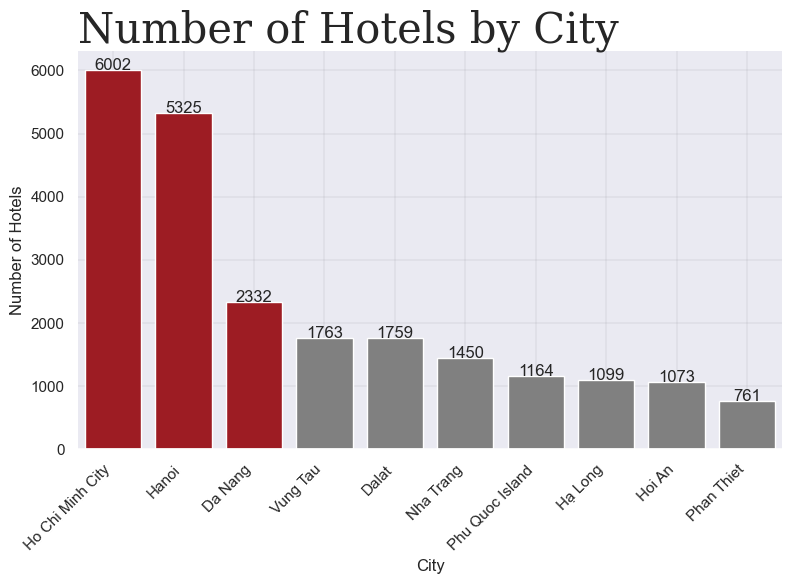

In [16]:
top10_hotel_by_city = hotel.city.value_counts().sort_values(ascending=False).head(10)

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Number of Hotels by City', loc='left', fontsize=30, fontfamily='serif')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of Hotels')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Kết luận:** Hồ Chí Minh, Hà Nội, Đà Nẵng, Vũng Tàu,.. là các thành phố lớn về du lịch. Điều này cũng lý giải lý do việc các cơ sở lưu trú ở đây có số lượng lớn hơn đáng kể so với các Thành phố khác.

*Hiện nay, cả nước có khoảng 33.330 cơ sở lưu trú du lịch với 667.000 buồng, trong đó có 215 khách sạn 5 sao với 72.000 buồng, 334 khách sạn 4 sao với 45.000 buồng.*

In [17]:
hotel_by_starrating = hotel.star_rating.value_counts()
hotel_by_starrating

5.0    9414
0.0    6045
3.0    5651
4.0    4196
2.0    2881
1.0    1259
Name: star_rating, dtype: int64

In [18]:
sum(hotel_by_starrating)

29446

**Nhận xét:**
- Số lượng cơ sở lưu trú khá tương đồng, tuy nhiên số **khách sạn 4 sao và 5 sao** lại **cao hơn** quá nhiều so với dữ liệu cơ sở lưu trú từ Tổng Cục Thống kê.
- Do đây là bài toán **data-driven** nên việc data không đúng thực tế dẫn đến việc phân tích sẽ sai rất nhiều nên mình sẽ phân tích một xíu theo hướng của mình về data này.

#### Accommidation type

In [19]:
data = [(type,getdf_type(df_type,type).shape[0]) for type in flattened_list]
# labels = [type for type in flattened_list]
# values = [getdf_type(df_type,type).shape[0] for type in flattened_list]
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Extracting labels and values
labels = [item[0] for item in sorted_data]
values = [item[1] for item in sorted_data]

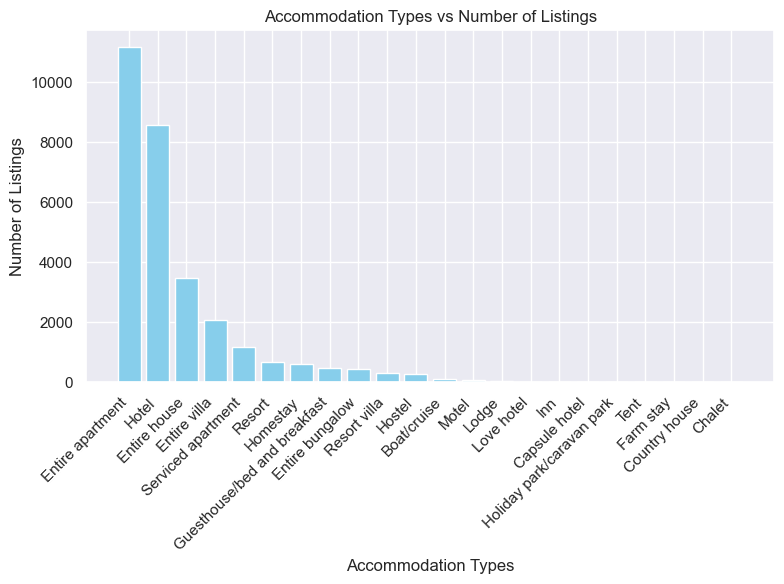

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Accommodation Types')
plt.ylabel('Number of Listings')
plt.title('Accommodation Types vs Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ta có thể thấy `Entire apartment`, `Hotel` và `Entire house` là các loại hình lưu trú được liệt kê nhiều nhất. Có thể hiểu là các loại hình này được đại đa số **ưa chuộng** vì hợp với **du lịch nhóm nhỏ** và **giá thành rẻ** hơn.

In [21]:
# check_type = ['Entire apartment','Hotel','Entire house','Entire villa']
df_1 = getdf_type(df_type,'Entire apartment')
df_2 = getdf_type(df_type,'Hotel')
df_3 = getdf_type(df_type,'Entire house')
df_4 = getdf_type(df_type,'Entire villa')

In [22]:
series1 = df_1.star_rating.value_counts().sort_index()
series2 = df_2.star_rating.value_counts().sort_index()
series3 = df_3.star_rating.value_counts().sort_index()
series4 = df_4.star_rating.value_counts().sort_index()

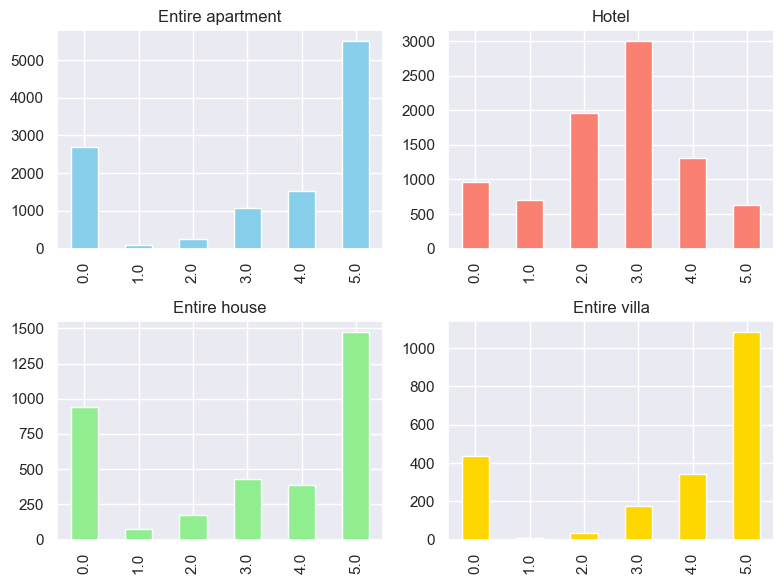

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
# Plot each series on its subplot
series1.plot(kind='bar', color='skyblue', ax=axs[0, 0])
series2.plot(kind='bar', color='salmon', ax=axs[0, 1])
series3.plot(kind='bar', color='lightgreen', ax=axs[1, 0])
series4.plot(kind='bar', color='gold', ax=axs[1, 1])

# Set titles and labels
axs[0, 0].set_title('Entire apartment')
axs[0, 1].set_title('Hotel')
axs[1, 0].set_title('Entire house')
axs[1, 1].set_title('Entire villa')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Biểu đồ xếp loại rating xét trên từng loại hình lưu trú. 
- `Entire apartment` và `Entire house` có thể xét là các loại hình **AirBnB**.
- `Entire villa` ...
- `Hotel` thì thỏa khá ổn tổng số loại hình lưu trú ở Việt Nam

Đến nay, cả nước hiện có 235 cơ sở lưu trú du lịch hạng 5 sao với 77.895
buồng và 354 cơ sở lưu trú du lịch hạng
4 sao với 47.502 buồng. So với cuối năm
2022, số lượng cơ sở lưu trú du lịch
được xếp hạng từ 4-5 sao trong 6 tháng
đầu năm 2023 tăng thêm 20 cơ sở và
7.275 buồng.

**Kết luận**: Theo mình thì việc phân tích chia ra từng phần như này về mặt ý tưởng của mình là do khi `.countvalues` của toàn bộ DataFrame thì kết quả số lượng `hotel_id` có rating 5 sao là gần 9000, một con số quá xa với trị thực tế. Do đây là một bài toán data-driven nên việc tách ra để mình muốn nắm rõ hơn về từng loại hình lưu trú ảnh hưởng như thế nào. Về việc đánh giá rating lại dựa trên ý tưởng bản thân thì thực tế cũng không tốt. Lý do có thể kể đến để giải thích cho sự chênh lệch này là có một số khách sạn trên `Agoda.com` làm giả rating hoặc là khai báo sai loại hình lưu trú dẫn đến việc label các loại hình bị vấn đề. Ví dụ trong `Entire apartment` vẫn còn khá nhiều khách sạn có trong `Entire apartment` mà không có trong loại hình `Hotel`

#### Number of reviews

Số lượng reviews là một tiêu chí đánh giá quan trọng thể hiện sự quan tâm của khách hàng đến các khách sạn trong từng khu vực. Có thể thể hiện được qua nhiều yếu tố:


- **Sự uy tín và độ tin cậy của khách hàng**: Số lượng reviews cao là bằng chứng cho sự **quan tâm** của khách hàng đến khách sạn.
- **Tăng khả năng xuất hiện trên các trang đặt phòng**: Review cao nghĩa là có nhiều người lui tới khách sạn, và các khách hàng mới với không nhiều kinh nghiệm sẽ theo **tâm lý đám đông** hoặc là có **nhiều thông tin** hơn trong việc tìm khách sạn.
- **Cải thiện chất lượng dịch vụ**: Khách sạn sẽ có nhiều cái nhìn **khách quan** hơn để điều chỉnh cũng như cải thiện chất lượng dịch vụ.

##### Reviews base on cities

In [24]:
reviews_df = hotel['number_of_reviews'].groupby(hotel['city']).sum().sort_values(ascending = False)
reviews_df.head(10)

city
Ho Chi Minh City    714097
Da Nang             415477
Hanoi               414398
Nha Trang           253724
Hoi An              186445
Dalat               141613
Vung Tau            126209
Phu Quoc Island     119851
Phan Thiet          117515
Hue                  65114
Name: number_of_reviews, dtype: int64

<AxesSubplot: xlabel='city'>

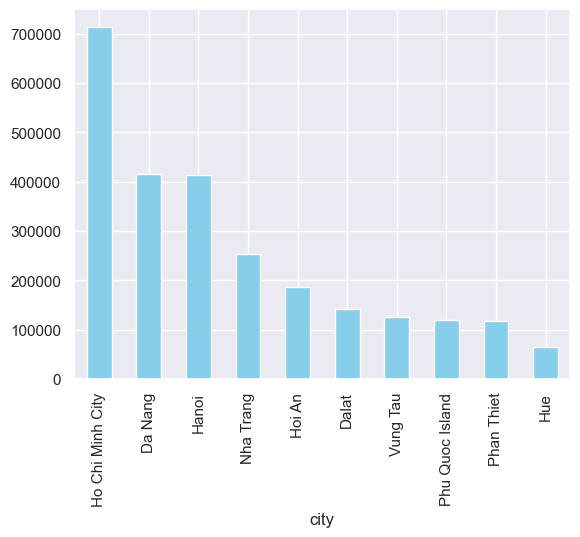

In [25]:
reviews_df.head(10).plot(kind='bar', color='skyblue')

**Kết luận:**
- Ta có thể thấy hầu hết các **thành phố lớn** đều chiếm số lượng **review cao**. Có thể kể đến như Hồ Chí Minh, Đà Nẵng và Hà Nội là những thành phố du lịch lớn ở Việt Nam. 
- Lưu ý đây là data chưa pre-processing, nên các yếu tố tiêu cực như các review ảo, các review trùng lặp sẽ không được xét đến. Vấn đề này sẽ được nhắc lại sau phần pre-processing.

##### Reviews base on rating

Phân tích số lượng review dựa trên rating

In [26]:
reviews_df1 = hotel['number_of_reviews'].groupby(hotel['star_rating']).sum().sort_index(ascending = False)
reviews_df1.head(10)

star_rating
5.0     616514
4.0    1004413
3.0     811190
2.0     278476
1.0      91320
0.0     127393
Name: number_of_reviews, dtype: int64

<AxesSubplot: xlabel='star_rating'>

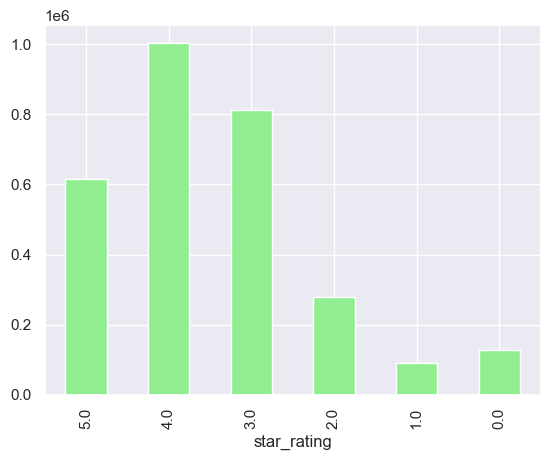

In [27]:
reviews_df1.head(10).plot(kind='bar', color='lightgreen')

**Nhận xét**: Hầu hết các review đều được thuộc nhóm lưu trú từ 3 sao trở lên. Điều này có thể hiểu theo nhiều khía cạnh phân tích.
- Về mặt cơ sở hạ tầng: Hiện tại các cơ sở lưu trú ở Việt Nam được đầu tư nhiều hơn nên việc đáp ứng đủ các tiêu chí 3 sao trở nên dễ dàng hơn.
- Về mặt khác: Các cơ sở lưu trú 0 sao như airbnb còn chưa phát triển mạnh ở Việt Nam. 

In [28]:
# series1 = df_1.star_rating.value_counts().sort_index()
series1 = df_1['number_of_reviews'].groupby(df_1['star_rating']).sum().sort_index(ascending = False)
series2 = df_2['number_of_reviews'].groupby(df_2['star_rating']).sum().sort_index(ascending = False)
series3 = df_3['number_of_reviews'].groupby(df_3['star_rating']).sum().sort_index(ascending = False)
series4 = df_4['number_of_reviews'].groupby(df_4['star_rating']).sum().sort_index(ascending = False)

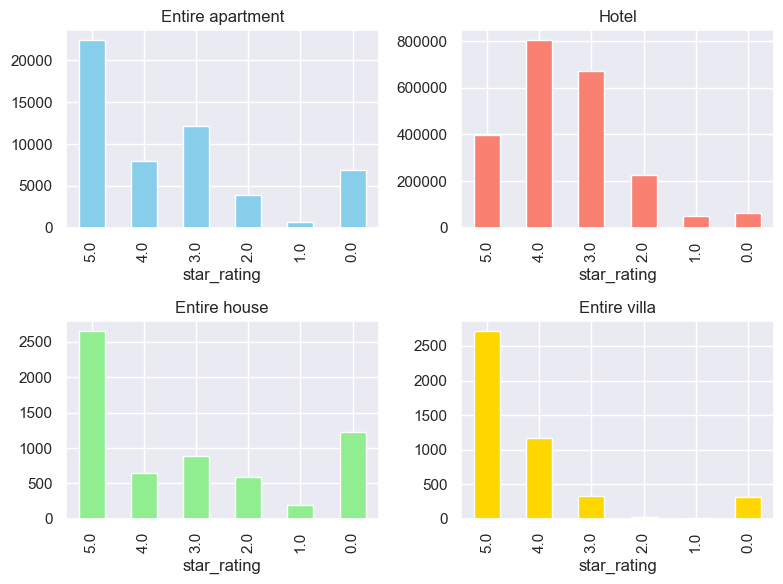

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
# Plot each series on its subplot
series1.plot(kind='bar', color='skyblue', ax=axs[0, 0])
series2.plot(kind='bar', color='salmon', ax=axs[0, 1])
series3.plot(kind='bar', color='lightgreen', ax=axs[1, 0])
series4.plot(kind='bar', color='gold', ax=axs[1, 1])

# Set titles and labels
axs[0, 0].set_title('Entire apartment')
axs[0, 1].set_title('Hotel')
axs[1, 0].set_title('Entire house')
axs[1, 1].set_title('Entire villa')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Nhận xét:** Phân tích các cơ sở lưu trú theo từng loại `accomodation type`
- Với lĩnh vực khách sạn ta nhận thấy được **thể hiện tốt** được dựa trên **sự phổ biến** của khách sạn 3 sao và 4 sao ở Việt Nam
- Với các lĩnh vực khác, hầu hết đều có số reviews về cơ sở lưu trú 5 sao khá cao, tuy vậy về độ phổ biển vẫn khá thấp **<2500** với các mô hình `Entire house` và `Entire villa`. Có thể hiểu các **loại hình cư trú** này chưa được **đại đa số tiếp cận**.

#### Year opened

`Year opened` là tiêu chí đánh giá quan trọng với khách sạn, với một số khách sạn mới mở thường sẽ có số lượng review thấp hơn nhiều so với các khách sạn đã mở lâu năm

In [30]:
# Count missing values
missing_values = hotel['yearopened'].isnull().sum()
print("Missing values:",missing_values,'/',hotel.shape[0])

Missing values: 24188 / 29446


In [31]:
hotel_yearopened = hotel.yearopened.value_counts()
hotel_yearopened.sort_index(ascending=False).head(10).sum()

3721

Số lượng cơ sở lưu trú mở từ 2015 trở đi chiếm đại đa số lượng `hotel` có `yearopened`, có thể hiểu vì các năm trước đó các cơ sở dữ liệu của Việt Nam chưa đủ tốt để cập nhật ngày bắt đầu kinh doanh của các cơ sở lưu trú.

In [32]:
test_df = hotel[pd.notnull(hotel['yearopened'])]
print(test_df.shape,hotel.shape)
reviews_df1 = test_df['number_of_reviews'].groupby(test_df['star_rating']).sum().sort_index(ascending = False)
reviews_df1

(5258, 12) (29446, 12)


star_rating
5.0    538414
4.0    836772
3.0    572526
2.0    172432
1.0     54292
0.0     57140
Name: number_of_reviews, dtype: int64

In [33]:
print('Number of reviews:',reviews_df1.sum(),'/',hotel.number_of_reviews.sum())

Number of reviews: 2231576 / 2929306


Ta có thể nhận thấy số lượng **cơ sở lưu trú có `yearopened`**, tức nghĩa các cơ sở dữ liệu có cập nhật trên cơ sở dữ liệu. Có **số lượng review** chiếm khá **cao**. Mặc dù chỉ chiếm bằng khoảng **1/6** so với tổng số review trên tất cả cơ sở lưu trú tuy nhiên số lượng review của các khách sạn này chiếm đại đa số phần lớn review được thu thập.

In [34]:
reviews_df2 = df_2['number_of_reviews'].groupby(df_2['star_rating']).sum().sort_index(ascending = False)
print(reviews_df2.sum())

2214583


Một lần nữa, ta có thể khẳng định **số lượng review** về **khách sạn** **chiếm phần lớn** các review cho các cơ sở lưu trú.

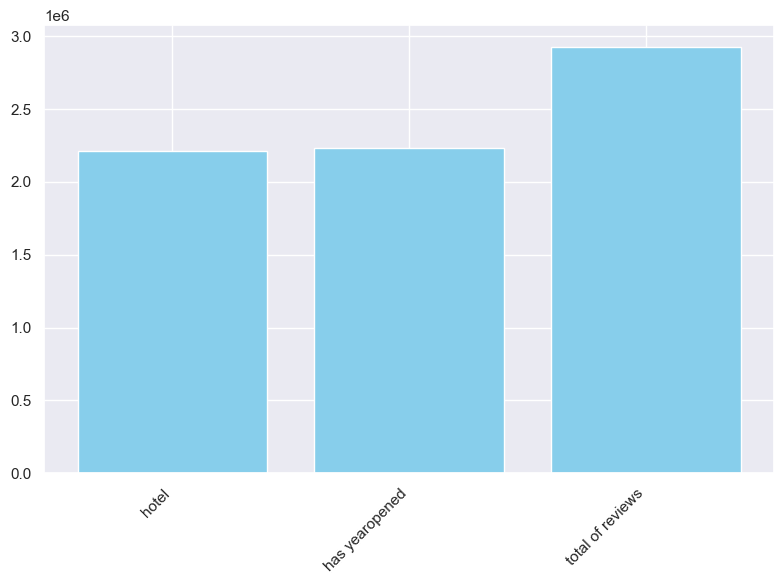

In [35]:
labels = ['hotel','has yearopened','total of reviews']
values = [reviews_df2.sum(),reviews_df1.sum(),hotel.number_of_reviews.sum()]
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
# plt.xlabel('Accommodation Types')
# plt.ylabel('Number of Listings')
# plt.title('Accommodation Types vs Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Kết luận:** Số lượng reviews tập trung nhiều vào cơ sở lưu trú dạng khách sạn và có `yearopened`. Có thể là do các cơ sở lưu trú khách sạn phổ biến nên được nhiều đánh giá. 

#### Rating average

Số lượng `rating_average` bằng 0 là 13037. Tức là các khách sạn chưa có bất cứ reviews nào. Để tiện cho việc vẽ hình, ta sẽ chỉ xét các cơ sở lưu trú với rating **>0** 

In [36]:
print(hotel[hotel['rating_average']==0].shape[0],':',hotel[hotel['rating_average']!=0].shape[0])

13037 : 16409


In [37]:
data = hotel[hotel['rating_average'] != 0 ].rating_average

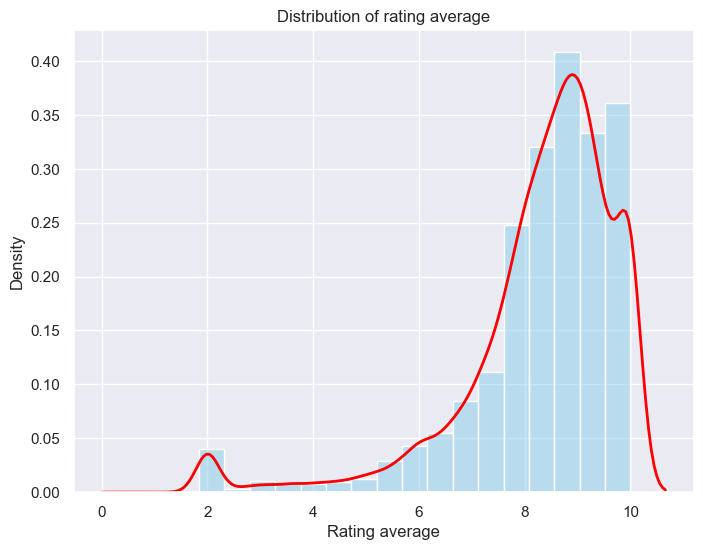

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data.dropna(), bins=20, kde=True, color='skyblue', stat='density')
sns.kdeplot(data.dropna(), linewidth=2, color='red', clip=(0, 11))
plt.title('Distribution of rating average')
plt.xlabel('Rating average')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Ta có thể thấy biểu đồ bị **lệch phải**, điều này thường xảy ra khi dữ liệu có nhiều giá trị cao hơn hẳn so với các giá trị nhỏ. Điều này có thể gây ảnh hưởng đến việc đánh giá phân phối của dữ liệu.

Tuy nhiên, xét về khía cạnh tâm lý, con người thường có xu hướng chỉ đưa ra lời nhận xét khi họ hài lòng về một sản phẩm hoặc dịch vụ, trong trường hợp này là khách sạn. Cảm giác hài lòng và sự hài lòng chủ yếu kích thích việc chia sẻ kinh nghiệm tích cực và lời khuyên cho người khác.
Một số nguyên nhân chính có thể giải thích hiện tượng này:
- **Tính cảm xúc tích cực**: Khi trải nghiệm của họ vượt quá mong đợi, họ cảm thấy hạnh phúc và muốn chia sẻ niềm vui này với người khác.
- **Tính độc đáo**: Trong một số trường hợp, trải nghiệm của họ có thể đặc biệt đối với họ, và họ muốn chia sẻ trải nghiệm này để giới thiệu với người khác.
- **Tính cá nhân**: Một số người có xu hướng chia sẻ trải nghiệm tích cực của mình để cảm thấy tự hào về quyết định của mình hoặc để tạo ra một ấn tượng tích cực về bản thân.

**Note**: Ta không phủ nhận sự **imbalance** của data. Tuy nhiên bài toán của chúng ta đặt ra là đưa ra những gợi ý giải pháp cho nhóm những khách sạn chưa có reviews để họ có cái nhìn toàn diện hơn về ngành khách sạn dựa trên số liệu thống kê thích hợp để cải thiện dựa trên **sự hài lòng** của khách hàng

#### Year Renovated

`yearrenovated` là tiêu chí đánh giá xem cơ sở lưu trú đã được cải tiến gần đây hay không. Điều này thể hiện rõ được sự quan tâm của chủ đầu tư vào cơ sở lưu trú mình sở hữu. 

In [39]:
print(hotel.yearrenovated.notnull().sum(),'/',hotel.yearrenovated.shape[0])

3057 / 29446


Tuy chỉ có 3057 cơ sở lưu trú được cải tiến gần đây. Có thể phân tích nhiều khía cạnh như:
- **Về mặt cơ sở dữ liệu**: Có những cơ sở đã được trùng tu nhưng không được cập nhật trên cơ sở dữ liệu.
- **Về mặt tình hình kinh tế**: Theo phân tích ở trên các cơ sở hầu như được mở từ 2015 trở lại đây nên việc trùng tu không phải là vấn đề quá lớn đối với các cơ sở dưới 10 năm tồn tại.

In [40]:
hotel.to_csv('hotel.csv', index=False, encoding='utf-8-sig')

## Preprocessing

Như phân tích ở trên chúng ta chỉ quan tâm đến một số columns trong `hotel` dataframe

In [41]:
hotel.columns.to_list()

['hotel_id',
 'hotel_name',
 'addressline1',
 'city',
 'state',
 'numberrooms',
 'yearopened',
 'yearrenovated',
 'number_of_reviews',
 'rating_average',
 'star_rating',
 'accommodation_type']

### Missing Data

In [42]:
missing = hotel.isna().sum()
missing
# Percentage to whole collumns
missing = round(missing[missing != 0]*100/len(hotel),2).sort_values(ascending=True)
missing.head()

addressline1           0.02
accommodation_type     0.10
state                  5.52
numberrooms            7.61
yearopened            82.14
dtype: float64

Text(0.5, 1.0, 'Missing Data Histogram')

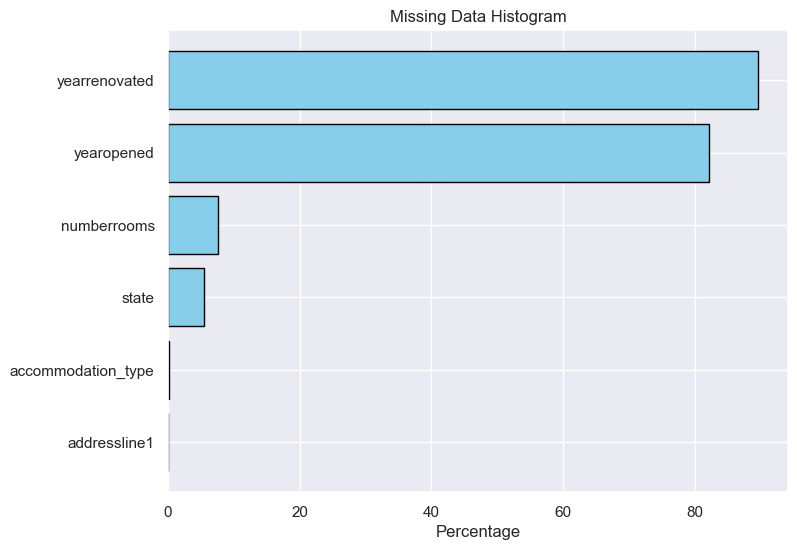

In [44]:
# Plot histogram
plt.figure(figsize=(8,6))
plt.barh(missing.index, missing.values, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Percentage')
# plt.ylabel('Value')
plt.title('Missing Data Histogram')